# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()
X_raw, X_new, y_raw, y_new = train_test_split(
        X_raw, y_raw, test_size=0.8, random_state=42)

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

In [2]:
import numpy as np
import math

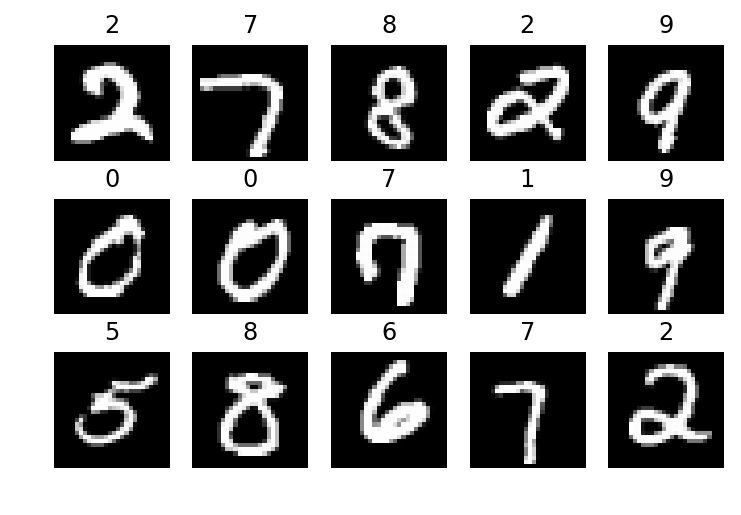

In [3]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))#每幅图像对应的target
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')#删除座标轴和刻度

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0] #0:index;1,2:height,width
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8) #这里的1代表了图像通道。
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    n_digit = random.randint(1, 6)
    for j in range(X_len):#j取出影像的index
        n_digit = random.randint(1, 5)
        for i in range(n_digit):
            index = random.randint(0, X_len - 1)
            image = X[index]#获取影像图
            label = y[index]#获取影像的target
            X_gen[j][:, i*width:(1+i)*width,0] = image# 
            y_gen[i][j][label] = 1
        
        for i in range(n_digit, n_len):
            y_gen[i][j][10] = 1
    return X_gen, y_gen

X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(
        X_raw, y_raw, test_size=0.2, random_state=42)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)
print ("X_train shape:",X_train.shape)
print ("X_valid shape:",X_valid.shape)
print ("X_test shape:" ,X_test.shape)

X_train shape: (9600, 28, 140, 1)
X_valid shape: (2400, 28, 140, 1)
X_test shape: (10000, 28, 140, 1)


### 数据归一化

In [5]:
X_train = X_train/255
#y_train = y_train/255,
X_valid = X_valid/255
#y_valid = y_valid/255,
X_test = X_test/255
#y_test = y_test/255,

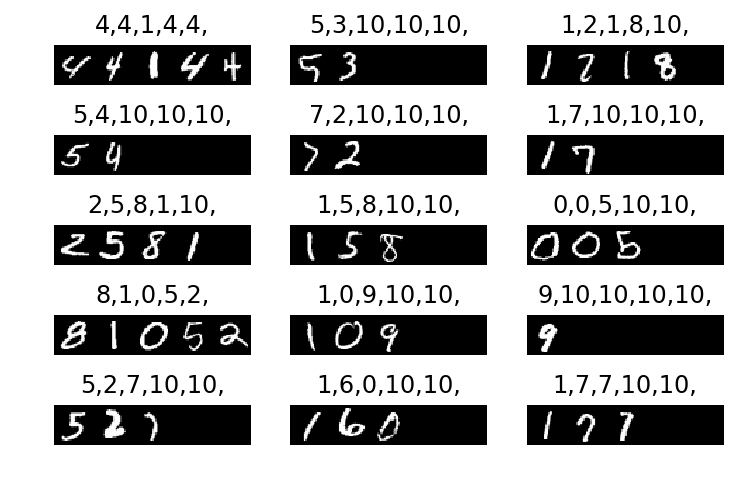

In [6]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')#X_test[index]是取得影像的位置，[：,：,0]中的0指的是image的channel
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**  
  - 通过定义要随机取出的最大数量n_digit和for循环，随机取出i个图像；  
  - 通过定义index，可以在给定的输入数据数目X.shape[0]范围内随机选取一幅影像的index；  
  - 使用10填充空白数字  
  - 参考了[stackoverflow](https://stackoverflow.com/questions/44067454/reshaping-image-array-n-width-height-to-n-height-width-channel)的代码编写，代码更加简洁和高效。  
训练集对构造的模型进行训练，找寻合适的参数，验证集测试我们训练出的模型的准确度，判断是否过拟合或欠拟合，进行改进；测试集保证了我们的模型具有泛化能力。

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [7]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Merge


In [8]:
#建立泛型模型
inputs = Input(shape=(28,140,1))

# block 1
x = Conv2D(64,(3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
x = Conv2D(64,(3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# block 2
x = Conv2D(128,(3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128,(3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), padding='same', name='block2_pool')(x)

# block 3
# x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# Classification block
x = Flatten(name='flatten')(x)
x = Dense(500, activation='relu', name='fc1')(x)#全连接层的作用是把多种预测转换为分类（上一位导师说这种说法是错误的，经过查阅资料，现在更正为：
          #全连接层则起到将学到的“分布式特征表示”映射到样本标记空间的作用 ）
# x = Dense(4096, activation='relu', name='fc2')(x)#此处为什么要构造两次？
x = Dropout(0.5)(x)

# num_1 = Dense(11, activation='softmax')(x)
# num_2 = Dense(11, activation='softmax')(x)
# num_3 = Dense(11, activation='softmax')(x)
# num_4 = Dense(11, activation='softmax')(x)
# num_5 = Dense(11, activation='softmax')(x)

outputs = [Dense(n_class, activation='softmax')(x) for i in range(5)]

model=Model(inputs=inputs,outputs=outputs)
model.summary

<bound method Container.summary of <keras.engine.training.Model object at 0x00000189470B8B70>>

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 我采用了CNN（卷积神经网络）技术。  

在CNN模型的搭建过程中，主要涉及到的技术包括：    
- **输入层（input layer）**  
定义了输入模型的图像尺寸，包含（长、宽、通道）。本文中由于是把5个图像拼合为一个，因此宽会增加4倍，且本模型中输入图像为灰度图像，因此通道为1，所以输入的shape为（28，140，1）
- **卷积层（Convolutional layer）**  
卷积层主要是通过过滤器（filter）对图像进行卷积运算，根据多个过滤器生成多个特征图（feature maps），对一个特征图来说，每个神经元对应的权值（weights），在一个特征图之内是共享的，相应的偏差（bias）也是共享的，这就大大减少了参数数量，与下文中提到的**池化层**结合，使得图像具有了传递不变性,，就像图片中是一只猫，如果移动到图片中不同的位置，结果仍旧是猫。过滤器定义为（64，3×3）  
- **Relu**  
>如果没有激活机制，信号的传递和网络训练将消耗巨大。ReLU激活函数使得神经元低于阈值时处于沉默状态。ReLU相对于Sigmoid一方面大大降低运算；另一方面在输入信号较强时，仍然能够保留信号之间的差别。  

也就是在卷积运算过程中，ReLU函数会根据阈值对卷积运算结果进行筛选，小于阈值的记为0，大于阈值的保留，这可以使得卷积运算结果具有稀疏性，进而增加运算的精确度，减小运算资源耗费。而ReLU函数为非线性，经过ReLU函数的激活，神经网络具有了非线性，也就能够拟合和逼近目标函数。
- **池化(pooling layer)**  
池化层紧跟在卷积层之后，实现简化卷积层输出中的信息。主要是进一步压缩特征，并提取feature maps中的主要特征。

- **全连接层(fully connected layers)**  
全连接层是与前一层中的所有激活数据是全部连接的，计算资源中大部分的内存和计算时间都被前面的卷积层占用，而大部分的参数都用在后面的全连接层，并且如果存在多层全连接层，第一个全连接层占用的参数会是比较大的比例。后来有模型（GoogleNet）采用平均汇聚代替了全连接层，也取得了类似的准确度，证明了全连接层在模型中也并非是不可或缺的。去掉全连接层可以显著减少模型参数的数量。


- **Dropout**  
Dropout是为了减少参与计算的参数数量且不会对结果精度有较大影响，会以选定的值[0,1]为概率，使得每一轮中每一个神经元都有对应的概率值不参与计算，通过多轮训练，更新权重。  
>因此dropout减少了神经元之间复杂的共适应关系，迫使网络学习更加鲁棒的特征

- **Softmax**  
[softmax回归](http://ufldl.stanford.edu/wiki/index.php/Softmax%E5%9B%9E%E5%BD%92)具有的特殊性使得它只用于最后一层，因为softmax是多输入多输出，而其他激活函数是单输入单输出。softmax回归与logistic回归做对比，logistic回归解决的是二分类的问题。发现一个有意思的例子，对K个类型进行分类，怎么选择softmax分类器和K个独立的二元分类器。主要取决于K个分类之间是否互斥。如果互斥，则选择softmax分类，如果不是互斥的，可以互相包含，则选择logistic回归。
- **categorical_crossentropy**  
categorical_crossentropy与binary_crossentropy分别对应softmax和sigmoid的损失函数
- **adam**  
[深度学习最全优化方法总结比较](https://zhuanlan.zhihu.com/p/22252270)  
> Adam(Adaptive Moment Estimation)本质上是带有动量项的RMSprop，它利用梯度的一阶矩估计和二阶矩估计动态调整每个参数的学习率。Adam的优点主要在于经过偏置校正后，每一次迭代学习率都有个确定范围，使得参数比较平稳。  
 特点：  
 结合了Adagrad善于处理稀疏梯度和RMSprop善于处理非平稳目标的优点  
 对内存需求较小  
 为不同的参数计算不同的自适应学习率  
 也适用于大多非凸优化 - 适用于大数据集和高维空间  

CNN 可能有几层网络，每个层可能捕获对象抽象层次中的不同级别。第一层是抽象层次的最底级，CNN 一般把图片中的较小的部分识别成简单的形状，例如水平、竖直的直线，简单的色块。下一层将会上升到更高的抽象层次，一般会识别更复杂的概念，例如形状（线的组合），以此类推直至最后由CNN分类器把这些复杂的层综合起来进行识别图片。CNN是通过正向和反向传导，自己学习识别图片上物体，不需要设定所需识别物体的特征，这也是与传统的机器学习区别较大的部分。

### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

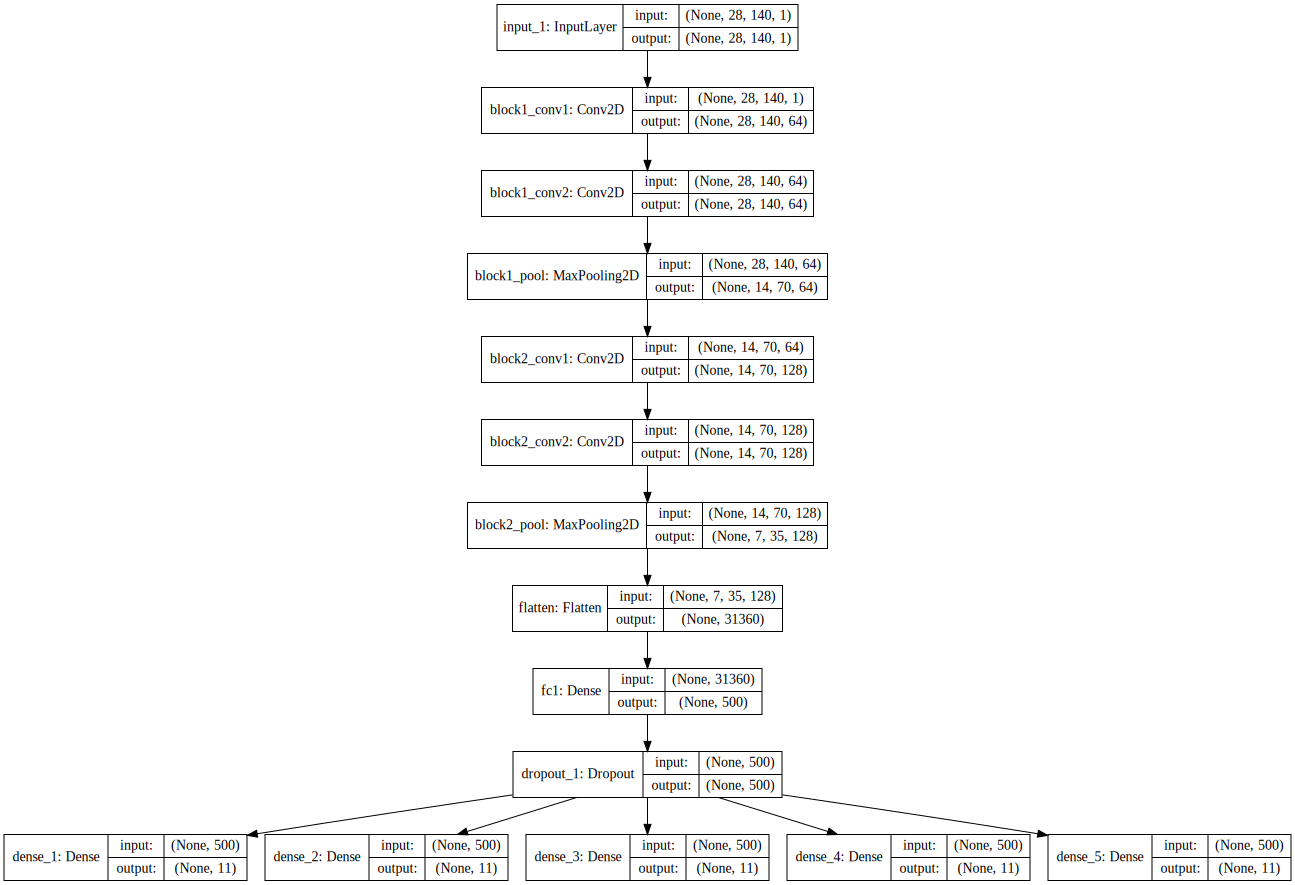

In [9]:
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**  
模型构架参考了
[VGG16](https://github.com/fchollet/keras/blob/master/keras/applications/vgg16.py)
的结构来设置,使用keras搭建模型采用了
[泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/)，
总共11层，4层conv，2层maxpooling，1层dense，1层input，1层flatten，1层fullconnect和1层dropout)  
  
第一层input shape为(-1,28,140,1),  

第一块  
第一层对input使用3x3卷积，depth为64，输出shape为(-1,28,140,64)，    
第二层对block1_conv1使用3×3卷积，depth为64，输出shape为(-1,28,140,64)，  
第三层对block1_conv2使用2x2的strides为2的maxpooling，输出shape变为(-1,14,70,64)，  

第二块   
第一层对block1_pool使用3×3卷积，depth为128，输出shape变为(-1,14,70,128)，  
第二层对block2_conv1使用3×3卷积，depth为128，输出shape变为（-1,14,70,128），    
第三层对block2_conv2使用2x2 的strides为2的maxpooling，输出shape变为(-1,7,35,128)，   
    
flatten后展平为(-1,7×35×128)  
经过全连接层，weight的shape是（7×35×128，500），一般写做（31360，500）    
然后dropout 0.5，      
最后经过5个dense输出5个shape为(-1,11)的二值化数字。



### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [10]:
batch_size = 32
epochs = 10

In [11]:
# TODO: 训练你的模型
'''
配置模型的学习过程
compile接收三个参数：
1.优化器optimizer：参数可指定为已预定义的优化器名，如rmsprop、adagrad，
或一个Optimizer类对象，如此处的RMSprop()
2.损失函数loss：参数为模型试图最小化的目标函数，可为预定义的损失函数，
如categorical_crossentropy、mse，也可以为一个损失函数
3.指标列表：对于分类问题，一般将该列表设置为metrics=['accuracy']
'''
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',# rmsprop为什么不采用？
             metrics = ['accuracy'])
'''
训练模型
batch_size：指定梯度下降时每个batch包含的样本数
epochs：训练的轮数
verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为epoch输出一行记录
validation_data：指定验证集
fit函数返回一个History的对象，其History.history属性记录了损失函数和其他指标的数值随epoch变化的情况，
如果有验证集的话，也包含了验证集的这些指标变化情况
'''
history = model.fit(X_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data = (X_valid, y_valid))
# 按batch计算在某些输入数据上模型的误差


Train on 9600 samples, validate on 2400 samples
Epoch 1/10
9600/9600 [==============================] - 908s - loss: 3.0858 - dense_1_loss: 0.7641 - dense_2_loss: 0.7309 - dense_3_loss: 0.6535 - dense_4_loss: 0.5495 - dense_5_loss: 0.3878 - dense_1_acc: 0.7406 - dense_2_acc: 0.7633 - dense_3_acc: 0.7853 - dense_4_acc: 0.8296 - dense_5_acc: 0.8859 - val_loss: 0.6045 - val_dense_1_loss: 0.1569 - val_dense_2_loss: 0.1372 - val_dense_3_loss: 0.1182 - val_dense_4_loss: 0.1105 - val_dense_5_loss: 0.0817 - val_dense_1_acc: 0.9525 - val_dense_2_acc: 0.9608 - val_dense_3_acc: 0.9696 - val_dense_4_acc: 0.9708 - val_dense_5_acc: 0.9750
Epoch 2/10
9600/9600 [==============================] - 879s - loss: 0.9643 - dense_1_loss: 0.2224 - dense_2_loss: 0.2234 - dense_3_loss: 0.2081 - dense_4_loss: 0.1806 - dense_5_loss: 0.1298 - dense_1_acc: 0.9286 - dense_2_acc: 0.9295 - dense_3_acc: 0.9305 - dense_4_acc: 0.9428 - dense_5_acc: 0.9581 - val_loss: 0.3878 - val_dense_1_loss: 0.1240 - val_dense_2_loss: 

In [12]:
score = model.evaluate(X_test,y_test,verbose=0)

In [13]:
print('Test score:',score[0])
print('Test accuracy:',score[1])

Test score: 0.201292927702
Test accuracy: 0.052258036474


### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

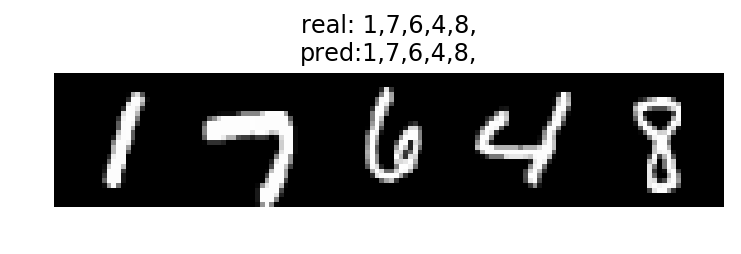

In [15]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [23]:
def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率
    right = 0
    # error = 0
    for index in range(X_test.shape[0]):
        y_pred = model.predict(X_test[index].reshape(1,height,width*n_len,1))
        if get_result(y_pred) == get_result([y_test[x][index] for x in range(n_len)]):
            right += 1
    return float (right)/(X_test.shape[0])
evaluate(model)

0.9437

In [ ]:
y_pred = model.predict(X_test, batch_size=128, verbose=1)
pred = np.argmax(y_pred, axis=-1)#axis的值只能取0或1，此处给定-1不太理解是什么意思。
test = np.argmax(y_test, axis=-1)
accuracy = np.all((pred==test), axis=0).mean()

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**  
模型的准确率为：94.37%；我觉得模型准确率基本满足解决问题。

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [24]:
model.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model.to_json())

# reference

1、本项目代码及部分思路参考了知乎用户**不想当博士的学生不是好工程师**公开的专栏文章[搭建一个数字识别项目](https://zhuanlan.zhihu.com/p/27547143),在此声明。  
2、[【Keras案例学习】 多层感知机做手写字符分类（mnist_mlp ）](http://www.cnblogs.com/surfzjy/p/6419201.html)  
3、[keras中文文档](https://keras-cn.readthedocs.io/en/latest/getting_started/sequential_model/)  
4、[Deep Learning模型之：CNN卷积神经网络（一）深度解析CNN](http://www.cnblogs.com/nsnow/p/4562363.html)  
5、[深度学习最全优化方法总结比较](https://zhuanlan.zhihu.com/p/22252270) 

#### 写在文末的收获：  
本项目卡自己卡了蛮久了，在做这个项目的过程中暴露出了自己很多方面的问题，首先就是对卷积图像处理使用的技术卷积神经网络（CNN）的一些基本概念不清楚，导致自己做项目做的稀里糊涂的，发生了以下一些问题：  
1、模型运行时间超级长，整个运行完，一共花了两天两夜  
2、模型不收敛，导致最后做出来的预测就是乱七八糟的，完全不对  
3、模型运行时的epoch结果不会看，导致第一轮的loss跟第二轮大约相等时，自己发现不了问题，仍旧等着模型运行 ，白白浪费时间 
4、自己对每一层中可调节的参数的总数目理解是错的，认为pooling层也能调节参数，实际上是不能的  
5、对inputs的图像的shape理解错误，不知道该写成什么形式传进模型中  
现在经过佳璐同学的指导，自己明白了一些最基础的问题的解决方法：
1、模型运行时间长的原因是batch_size定的太大了（1600），导致机器花费过多的时间在数据的调用存储等处理上，后来改用了batch_size（32），情况好了很多，同时参考review导师提供的[深度机器学习中的batch的大小对学习效果有何影响](https://www.zhihu.com/question/32673260),明白了batch_size的选择要适当，不能过大，也不能过小，虽然越大，训练出的精度越高，但是机器配置不足会影响时间效率，可以在机器允许的范围内选择大的batch_size  
2、模型不收敛，解决办法是：  
- 1、把数据集缩小了，方便快速完成模型实验
- 2、对数据集进行了归一化
- 3、把模型中的网络改小了，从把隐藏层中的block4层改成了2层
- 4、添加上了全连接层，参数设置为了500[全连接层的作用是什么](https://www.zhihu.com/question/41037974)
- 5，改小了batch_size,从256改为32  
  后续会测试不收敛到底是缺失了fullconnect，还是数据集没有进行归一化导致的
  
3、epoch在第一轮训练完进入第二轮后，loss会有一个巨大的减小，如果没有减小，那就肯定是算法错误了，可以停掉改错误，不用等模型训练完毕  

#  未解决的问题

# 下边是我aws的配置过程，从头配置 

**写在开始的一些声明**：  
我的系统为Windows10，ssh选用了putty  
由于为了学习YouTube视频及使用Google，自己开了shadowsock：  
![image.png](http://ow1qag7ew.bkt.clouddn.com/17-9-12/11914040.jpg)   
不知道这个ip地址会不会对连接服务器产生影响

### 下边我按照[在AWS上配置深度学习主机](https://zhuanlan.zhihu.com/p/25066187)的步骤重新配置一遍

 ###  填写工单  
由于P.xlarge是收费的，所以本处选择了免费的t2.micro类型

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/8126403.jpg)

###  结果

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/70198817.jpg)

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/62641703.jpg)

###  开启实例

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/98552522.jpg)

###  其余按照步骤默认设置，到配置安全组

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/60066278.jpg)

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/62641703.jpg)

###  加载密钥之后，开启实例

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/65077256.jpg)

###  使用putty做ssh

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/3939150.jpg)

###  通过ssh登陆

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/74262911.jpg)

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/4892044.jpg)

最终效果，成功了！

![img](http://ow1qag7ew.bkt.clouddn.com/17-9-12/62046993.jpg)